<a href="https://colab.research.google.com/github/adityakalra581/Data-Science/blob/master/Week%201%20Exercise(NLP%20in%20TenserFlow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Natural Language Processing in TensorFlow
$$by-deeplearning.ai$$

- This is Week 1 Final Exercise of the Course, where the BBC dataset is Explored.

### Topics Covered this Week:

- 1. Word Based Encodings
- 2. TensorFlow Api's
- 3. Tokenizer
- 4. Padding

#### Bonus:

- Word Cloud Visualization of the Different Dataset's Columns.


In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

  
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


#Stopwords list from https://github.com/Yoast/YoastSEO.js/blob/develop/src/config/stopwords.js
# Convert it to a Python list and paste it here
stopwords =  ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]


--2020-03-18 15:41:55--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 2607:f8b0:400c:c0f::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.06s   

2020-03-18 15:41:55 (80.9 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [0]:
import pandas as pd

sentences = []
labels = []
with open("/tmp/bbc-text.csv", 'r') as csvfile:
    # Your Code here
    data = pd.read_csv("/tmp/bbc-text.csv") 

data.head()


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [0]:
print(data.shape)

(2225, 2)


In [0]:
sentences=data['text']

print(len(sentences))
print(sentences[0])

#Expected output
# 2225
# tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable satellite companies worried means terms advertising revenues well brand identity viewer loyalty channels. although us leads technology moment also concern raised europe particularly growing uptake services like sky+. happens today will see nine months years time uk adam hume bbc broadcast s futurologist told bbc news website. likes bbc no issues lost advertising revenue yet. pressing issue moment commercial uk broadcasters brand loyalty important everyone. will talking content brands rather network brands said tim hanlon brand communications firm starcom mediavest. reality broadband connections anybody can producer content. added: challenge now hard promote programme much choice. means said stacey jolna senior vice president tv guide tv group way people find content want watch simplified tv viewers. means networks us terms channels take leaf google s book search engine future instead scheduler help people find want watch. kind channel model might work younger ipod generation used taking control gadgets play them. might not suit everyone panel recognised. older generations comfortable familiar schedules channel brands know getting. perhaps not want much choice put hands mr hanlon suggested. end kids just diapers pushing buttons already - everything possible available said mr hanlon. ultimately consumer will tell market want. 50 000 new gadgets technologies showcased ces many enhancing tv-watching experience. high-definition tv sets everywhere many new models lcd (liquid crystal display) tvs launched dvr capability built instead external boxes. one example launched show humax s 26-inch lcd tv 80-hour tivo dvr dvd recorder. one us s biggest satellite tv companies directtv even launched branded dvr show 100-hours recording capability instant replay search function. set can pause rewind tv 90 hours. microsoft chief bill gates announced pre-show keynote speech partnership tivo called tivotogo means people can play recorded programmes windows pcs mobile devices. reflect increasing trend freeing multimedia people can watch want want.

2225
tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to 

In [0]:
tokenizer = Tokenizer(num_words=None)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(len(word_index))


29726


In [0]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences,padding='post')
print(padded[0])
print(padded.shape)


[176 264   6 ...   0   0   0]
(2225, 4491)


In [0]:
## Creating a seperate Tokenizer for the Labels.
## Labels is nothing but Category in the dataset.
labels = data['category']
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
label_word_index = label_tokenizer.word_index
label_seq = label_tokenizer.texts_to_sequences(labels)
print(label_seq)
print(label_word_index)

# Expected Output
# [[4], [2], [1], [1], [5], [3], [3], [1], [1], [5], [5], [2], [2], [3], [1], [2], [3], [1], [2], [4], [4], [4], [1], [1], [4], [1], [5], [4], [3], [5], [3], [4], [5], [5], [2], [3], [4], [5], [3], [2], [3], [1], [2], [1], [4], [5], [3], [3], [3], [2], [1], [3], [2], [2], [1], [3], [2], [1], [1], [2], [2], [1], [2], [1], [2], [4], [2], [5], [4], [2], [3], [2], [3], [1], [2], [4], [2], [1], [1], [2], [2], [1], [3], [2], [5], [3], [3], [2], [5], [2], [1], [1], [3], [1], [3], [1], [2], [1], [2], [5], [5], [1], [2], [3], [3], [4], [1], [5], [1], [4], [2], [5], [1], [5], [1], [5], [5], [3], [1], [1], [5], [3], [2], [4], [2], [2], [4], [1], [3], [1], [4], [5], [1], [2], [2], [4], [5], [4], [1], [2], [2], [2], [4], [1], [4], [2], [1], [5], [1], [4], [1], [4], [3], [2], [4], [5], [1], [2], [3], [2], [5], [3], [3], [5], [3], [2], [5], [3], [3], [5], [3], [1], [2], [3], [3], [2], [5], [1], [2], [2], [1], [4], [1], [4], [4], [1], [2], [1], [3], [5], [3], [2], [3], [2], [4], [3], [5], [3], [4], [2], [1], [2], [1], [4], [5], [2], [3], [3], [5], [1], [5], [3], [1], [5], [1], [1], [5], [1], [3], [3], [5], [4], [1], [3], [2], [5], [4], [1], [4], [1], [5], [3], [1], [5], [4], [2], [4], [2], [2], [4], [2], [1], [2], [1], [2], [1], [5], [2], [2], [5], [1], [1], [3], [4], [3], [3], [3], [4], [1], [4], [3], [2], [4], [5], [4], [1], [1], [2], [2], [3], [2], [4], [1], [5], [1], [3], [4], [5], [2], [1], [5], [1], [4], [3], [4], [2], [2], [3], [3], [1], [2], [4], [5], [3], [4], [2], [5], [1], [5], [1], [5], [3], [2], [1], [2], [1], [1], [5], [1], [3], [3], [2], [5], [4], [2], [1], [2], [5], [2], [2], [2], [3], [2], [3], [5], [5], [2], [1], [2], [3], [2], [4], [5], [2], [1], [1], [5], [2], [2], [3], [4], [5], [4], [3], [2], [1], [3], [2], [5], [4], [5], [4], [3], [1], [5], [2], [3], [2], [2], [3], [1], [4], [2], [2], [5], [5], [4], [1], [2], [5], [4], [4], [5], [5], [5], [3], [1], [3], [4], [2], [5], [3], [2], [5], [3], [3], [1], [1], [2], [3], [5], [2], [1], [2], [2], [1], [2], [3], [3], [3], [1], [4], [4], [2], [4], [1], [5], [2], [3], [2], [5], [2], [3], [5], [3], [2], [4], [2], [1], [1], [2], [1], [1], [5], [1], [1], [1], [4], [2], [2], [2], [3], [1], [1], [2], [4], [2], [3], [1], [3], [4], [2], [1], [5], [2], [3], [4], [2], [1], [2], [3], [2], [2], [1], [5], [4], [3], [4], [2], [1], [2], [5], [4], [4], [2], [1], [1], [5], [3], [3], [3], [1], [3], [4], [4], [5], [3], [4], [5], [2], [1], [1], [4], [2], [1], [1], [3], [1], [1], [2], [1], [5], [4], [3], [1], [3], [4], [2], [2], [2], [4], [2], [2], [1], [1], [1], [1], [2], [4], [5], [1], [1], [4], [2], [4], [5], [3], [1], [2], [3], [2], [4], [4], [3], [4], [2], [1], [2], [5], [1], [3], [5], [1], [1], [3], [4], [5], [4], [1], [3], [2], [5], [3], [2], [5], [1], [1], [4], [3], [5], [3], [5], [3], [4], [3], [5], [1], [2], [1], [5], [1], [5], [4], [2], [1], [3], [5], [3], [5], [5], [5], [3], [5], [4], [3], [4], [4], [1], [1], [4], [4], [1], [5], [5], [1], [4], [5], [1], [1], [4], [2], [3], [4], [2], [1], [5], [1], [5], [3], [4], [5], [5], [2], [5], [5], [1], [4], [4], [3], [1], [4], [1], [3], [3], [5], [4], [2], [4], [4], [4], [2], [3], [3], [1], [4], [2], [2], [5], [5], [1], [4], [2], [4], [5], [1], [4], [3], [4], [3], [2], [3], [3], [2], [1], [4], [1], [4], [3], [5], [4], [1], [5], [4], [1], [3], [5], [1], [4], [1], [1], [3], [5], [2], [3], [5], [2], [2], [4], [2], [5], [4], [1], [4], [3], [4], [3], [2], [3], [5], [1], [2], [2], [2], [5], [1], [2], [5], [5], [1], [5], [3], [3], [3], [1], [1], [1], [4], [3], [1], [3], [3], [4], [3], [1], [2], [5], [1], [2], [2], [4], [2], [5], [5], [5], [2], [5], [5], [3], [4], [2], [1], [4], [1], [1], [3], [2], [1], [4], [2], [1], [4], [1], [1], [5], [1], [2], [1], [2], [4], [3], [4], [2], [1], [1], [2], [2], [2], [2], [3], [1], [2], [4], [2], [1], [3], [2], [4], [2], [1], [2], [3], [5], [1], [2], [3], [2], [5], [2], [2], [2], [1], [3], [5], [1], [3], [1], [3], [3], [2], [2], [1], [4], [5], [1], [5], [2], [2], [2], [4], [1], [4], [3], [4], [4], [4], [1], [4], [4], [5], [5], [4], [1], [5], [4], [1], [1], [2], [5], [4], [2], [1], [2], [3], [2], [5], [4], [2], [3], [2], [4], [1], [2], [5], [2], [3], [1], [5], [3], [1], [2], [1], [3], [3], [1], [5], [5], [2], [2], [1], [4], [4], [1], [5], [4], [4], [2], [1], [5], [4], [1], [1], [2], [5], [2], [2], [2], [5], [1], [5], [4], [4], [4], [3], [4], [4], [5], [5], [1], [1], [3], [2], [5], [1], [3], [5], [4], [3], [4], [4], [2], [5], [3], [4], [3], [3], [1], [3], [3], [5], [4], [1], [3], [1], [5], [3], [2], [2], [3], [1], [1], [1], [5], [4], [4], [2], [5], [1], [3], [4], [3], [5], [4], [4], [2], [2], [1], [2], [2], [4], [3], [5], [2], [2], [2], [2], [2], [4], [1], [3], [4], [4], [2], [2], [5], [3], [5], [1], [4], [1], [5], [1], [4], [1], [2], [1], [3], [3], [5], [2], [1], [3], [3], [1], [5], [3], [2], [4], [1], [2], [2], [2], [5], [5], [4], [4], [2], [2], [5], [1], [2], [5], [4], [4], [2], [2], [1], [1], [1], [3], [3], [1], [3], [1], [2], [5], [1], [4], [5], [1], [1], [2], [2], [4], [4], [1], [5], [1], [5], [1], [5], [3], [5], [5], [4], [5], [2], [2], [3], [1], [3], [4], [2], [3], [1], [3], [1], [5], [1], [3], [1], [1], [4], [5], [1], [3], [1], [1], [2], [4], [5], [3], [4], [5], [3], [5], [3], [5], [5], [4], [5], [3], [5], [5], [4], [4], [1], [1], [5], [5], [4], [5], [3], [4], [5], [2], [4], [1], [2], [5], [5], [4], [5], [4], [2], [5], [1], [5], [2], [1], [2], [1], [3], [4], [5], [3], [2], [5], [5], [3], [2], [5], [1], [3], [1], [2], [2], [2], [2], [2], [5], [4], [1], [5], [5], [2], [1], [4], [4], [5], [1], [2], [3], [2], [3], [2], [2], [5], [3], [2], [2], [4], [3], [1], [4], [5], [3], [2], [2], [1], [5], [3], [4], [2], [2], [3], [2], [1], [5], [1], [5], [4], [3], [2], [2], [4], [2], [2], [1], [2], [4], [5], [3], [2], [3], [2], [1], [4], [2], [3], [5], [4], [2], [5], [1], [3], [3], [1], [3], [2], [4], [5], [1], [1], [4], [2], [1], [5], [4], [1], [3], [1], [2], [2], [2], [3], [5], [1], [3], [4], [2], [2], [4], [5], [5], [4], [4], [1], [1], [5], [4], [5], [1], [3], [4], [2], [1], [5], [2], [2], [5], [1], [2], [1], [4], [3], [3], [4], [5], [3], [5], [2], [2], [3], [1], [4], [1], [1], [1], [3], [2], [1], [2], [4], [1], [2], [2], [1], [3], [4], [1], [2], [4], [1], [1], [2], [2], [2], [2], [3], [5], [4], [2], [2], [1], [2], [5], [2], [5], [1], [3], [2], [2], [4], [5], [2], [2], [2], [3], [2], [3], [4], [5], [3], [5], [1], [4], [3], [2], [4], [1], [2], [2], [5], [4], [2], [2], [1], [1], [5], [1], [3], [1], [2], [1], [2], [3], [3], [2], [3], [4], [5], [1], [2], [5], [1], [3], [3], [4], [5], [2], [3], [3], [1], [4], [2], [1], [5], [1], [5], [1], [2], [1], [3], [5], [4], [2], [1], [3], [4], [1], [5], [2], [1], [5], [1], [4], [1], [4], [3], [1], [2], [5], [4], [4], [3], [4], [5], [4], [1], [2], [4], [2], [5], [1], [4], [3], [3], [3], [3], [5], [5], [5], [2], [3], [3], [1], [1], [4], [1], [3], [2], [2], [4], [1], [4], [2], [4], [3], [3], [1], [2], [3], [1], [2], [4], [2], [2], [5], [5], [1], [2], [4], [4], [3], [2], [3], [1], [5], [5], [3], [3], [2], [2], [4], [4], [1], [1], [3], [4], [1], [4], [2], [1], [2], [3], [1], [5], [2], [4], [3], [5], [4], [2], [1], [5], [4], [4], [5], [3], [4], [5], [1], [5], [1], [1], [1], [3], [4], [1], [2], [1], [1], [2], [4], [1], [2], [5], [3], [4], [1], [3], [4], [5], [3], [1], [3], [4], [2], [5], [1], [3], [2], [4], [4], [4], [3], [2], [1], [3], [5], [4], [5], [1], [4], [2], [3], [5], [4], [3], [1], [1], [2], [5], [2], [2], [3], [2], [2], [3], [4], [5], [3], [5], [5], [2], [3], [1], [3], [5], [1], [5], [3], [5], [5], [5], [2], [1], [3], [1], [5], [4], [4], [2], [3], [5], [2], [1], [2], [3], [3], [2], [1], [4], [4], [4], [2], [3], [3], [2], [1], [1], [5], [2], [1], [1], [3], [3], [3], [5], [3], [2], [4], [2], [3], [5], [5], [2], [1], [3], [5], [1], [5], [3], [3], [2], [3], [1], [5], [5], [4], [4], [4], [4], [3], [4], [2], [4], [1], [1], [5], [2], [4], [5], [2], [4], [1], [4], [5], [5], [3], [3], [1], [2], [2], [4], [5], [1], [3], [2], [4], [5], [3], [1], [5], [3], [3], [4], [1], [3], [2], [3], [5], [4], [1], [3], [5], [5], [2], [1], [4], [4], [1], [5], [4], [3], [4], [1], [3], [3], [1], [5], [1], [3], [1], [4], [5], [1], [5], [2], [2], [5], [5], [5], [4], [1], [2], [2], [3], [3], [2], [3], [5], [1], [1], [4], [3], [1], [2], [1], [2], [4], [1], [1], [2], [5], [1], [1], [4], [1], [2], [3], [2], [5], [4], [5], [3], [2], [5], [3], [5], [3], [3], [2], [1], [1], [1], [4], [4], [1], [3], [5], [4], [1], [5], [2], [5], [3], [2], [1], [4], [2], [1], [3], [2], [5], [5], [5], [3], [5], [3], [5], [1], [5], [1], [3], [3], [2], [3], [4], [1], [4], [1], [2], [3], [4], [5], [5], [3], [5], [3], [1], [1], [3], [2], [4], [1], [3], [3], [5], [1], [3], [3], [2], [4], [4], [2], [4], [1], [1], [2], [3], [2], [4], [1], [4], [3], [5], [1], [2], [1], [5], [4], [4], [1], [3], [1], [2], [1], [2], [1], [1], [5], [5], [2], [4], [4], [2], [4], [2], [2], [1], [1], [3], [1], [4], [1], [4], [1], [1], [2], [2], [4], [1], [2], [4], [4], [3], [1], [2], [5], [5], [4], [3], [1], [1], [4], [2], [4], [5], [5], [3], [3], [2], [5], [1], [5], [5], [2], [1], [3], [4], [2], [1], [5], [4], [3], [3], [1], [1], [2], [2], [2], [2], [2], [5], [2], [3], [3], [4], [4], [5], [3], [5], [2], [3], [1], [1], [2], [4], [2], [4], [1], [2], [2], [3], [1], [1], [3], [3], [5], [5], [3], [2], [3], [3], [2], [4], [3], [3], [3], [3], [3], [5], [5], [4], [3], [1], [3], [1], [4], [1], [1], [1], [5], [4], [5], [4], [1], [4], [1], [1], [5], [5], [2], [5], [5], [3], [2], [1], [4], [4], [3], [2], [1], [2], [5], [1], [3], [5], [1], [1], [2], [3], [4], [4], [2], [2], [1], [3], [5], [1], [1], [3], [5], [4], [1], [5], [2], [3], [1], [3], [4], [5], [1], [3], [2], [5], [3], [5], [3], [1], [3], [2], [2], [3], [2], [4], [1], [2], [5], [2], [1], [1], [5], [4], [3], [4], [3], [3], [1], [1], [1], [2], [4], [5], [2], [1], [2], [1], [2], [4], [2], [2], [2], [2], [1], [1], [1], [2], [2], [5], [2], [2], [2], [1], [1], [1], [4], [2], [1], [1], [1], [2], [5], [4], [4], [4], [3], [2], [2], [4], [2], [4], [1], [1], [3], [3], [3], [1], [1], [3], [3], [4], [2], [1], [1], [1], [1], [2], [1], [2], [2], [2], [2], [1], [3], [1], [4], [4], [1], [4], [2], [5], [2], [1], [2], [4], [4], [3], [5], [2], [5], [2], [4], [3], [5], [3], [5], [5], [4], [2], [4], [4], [2], [3], [1], [5], [2], [3], [5], [2], [4], [1], [4], [3], [1], [3], [2], [3], [3], [2], [2], [2], [4], [3], [2], [3], [2], [5], [3], [1], [3], [3], [1], [5], [4], [4], [2], [4], [1], [2], [2], [3], [1], [4], [4], [4], [1], [5], [1], [3], [2], [3], [3], [5], [4], [2], [4], [1], [5], [5], [1], [2], [5], [4], [4], [1], [5], [2], [3], [3], [3], [4], [4], [2], [3], [2], [3], [3], [5], [1], [4], [2], [4], [5], [4], [4], [1], [3], [1], [1], [3], [5], [5], [2], [3], [3], [1], [2], [2], [4], [2], [4], [4], [1], [2], [3], [1], [2], [2], [1], [4], [1], [4], [5], [1], [1], [5], [2], [4], [1], [1], [3], [4], [2], [3], [1], [1], [3], [5], [4], [4], [4], [2], [1], [5], [5], [4], [2], [3], [4], [1], [1], [4], [4], [3], [2], [1], [5], [5], [1], [5], [4], [4], [2], [2], [2], [1], [1], [4], [1], [2], [4], [2], [2], [1], [2], [3], [2], [2], [4], [2], [4], [3], [4], [5], [3], [4], [5], [1], [3], [5], [2], [4], [2], [4], [5], [4], [1], [2], [2], [3], [5], [3], [1]]
# {'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}

[[4], [2], [1], [1], [5], [3], [3], [1], [1], [5], [5], [2], [2], [3], [1], [2], [3], [1], [2], [4], [4], [4], [1], [1], [4], [1], [5], [4], [3], [5], [3], [4], [5], [5], [2], [3], [4], [5], [3], [2], [3], [1], [2], [1], [4], [5], [3], [3], [3], [2], [1], [3], [2], [2], [1], [3], [2], [1], [1], [2], [2], [1], [2], [1], [2], [4], [2], [5], [4], [2], [3], [2], [3], [1], [2], [4], [2], [1], [1], [2], [2], [1], [3], [2], [5], [3], [3], [2], [5], [2], [1], [1], [3], [1], [3], [1], [2], [1], [2], [5], [5], [1], [2], [3], [3], [4], [1], [5], [1], [4], [2], [5], [1], [5], [1], [5], [5], [3], [1], [1], [5], [3], [2], [4], [2], [2], [4], [1], [3], [1], [4], [5], [1], [2], [2], [4], [5], [4], [1], [2], [2], [2], [4], [1], [4], [2], [1], [5], [1], [4], [1], [4], [3], [2], [4], [5], [1], [2], [3], [2], [5], [3], [3], [5], [3], [2], [5], [3], [3], [5], [3], [1], [2], [3], [3], [2], [5], [1], [2], [2], [1], [4], [1], [4], [4], [1], [2], [1], [3], [5], [3], [2], [3], [2], [4], [3], [5], [3], [4], [2],

In [0]:
sentences

0       tv future in the hands of viewers with home th...
1       worldcom boss  left books alone  former worldc...
2       tigers wary of farrell  gamble  leicester say ...
3       yeading face newcastle in fa cup premiership s...
4       ocean s twelve raids box office ocean s twelve...
                              ...                        
2220    cars pull down us retail figures us retail sal...
2221    kilroy unveils immigration policy ex-chatshow ...
2222    rem announce new glasgow concert us band rem h...
2223    how political squabbles snowball it s become c...
2224    souness delight at euro progress boss graeme s...
Name: text, Length: 2225, dtype: object

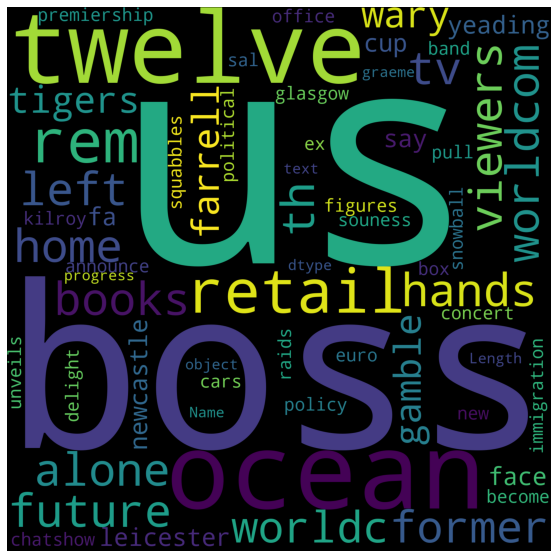

In [0]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

word = str(sentences[::])
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 1600, height = 1600, 
                background_color ='black', 
                stopwords = stopwords).generate(word) 
  
# plotting the Wordcloud Image                        
plt.figure(figsize = (10, 10)) 
plt.imshow(wordcloud) 
plt.axis("off")  
plt.show()

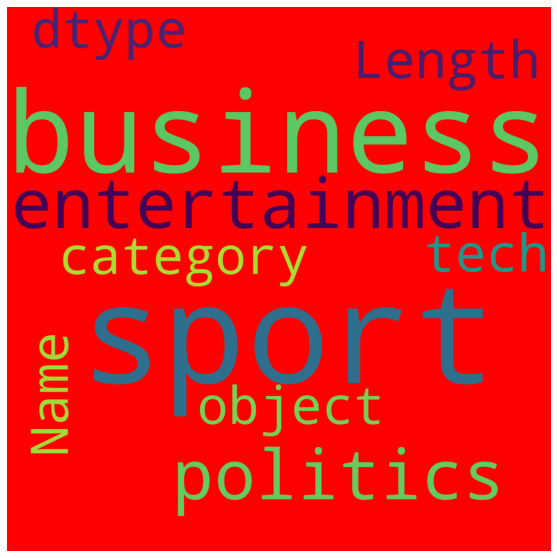

In [0]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

word = str(labels[::])
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 1600, height = 1600, 
                background_color ='red', 
                stopwords = stopwords).generate(word) 
  
# plotting the Wordcloud Image                        
plt.figure(figsize = (10, 10)) 
plt.imshow(wordcloud) 
plt.axis("off")  
plt.show()

In [0]:
data.nunique()

category       5
text        2126
dtype: int64